###### The cell below loads the visual style of the notebook when run.

In [3]:
from IPython.core.display import HTML
css_file = '../../styles/styles.css'
HTML(open(css_file, "r").read())

# Solving Differential Equations

<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span>Learning Objectives</h2>
</div>
</section>

> * Learn how to solve ordinary differential equations using both Euler's Method and SciPy

<div class="alert alert-info">
<h4>
As a not-so-subtle hint, the material in this lecture may come in handy when you need to solve the Lane-Emden equations of stellar structure in the PHY213 Labs!</h4>
</div>


## Ordinary Differential Equations

Ordinary differential equations are ones that can be written in the form

$$
\frac{d{\mathbf X}}{dt} = {\mathbf f}({\mathbf X}, t),
$$

where the bold typeface indicates a vector. 

A simple example is an object falling straight down under gravity. This object obeys the second-order differential equation

$$\frac{d^2y}{dt^2} = -g.$$

This doesn't look like the equation above for an ordinary differential equation. However, we can break this into two, coupled, equations:

$$
\begin{align*}
\frac{dy}{dt} &= v_y \\ 
\frac{d v_y}{dt} &= -g.
\end{align*}
$$

This can be written in the above vector form if

$$
{\mathbf X} = \begin{bmatrix}y \\ v_y \end{bmatrix}
$$

and 

$$
{\mathbf f}({\mathbf X}, t) = \frac{d{\mathbf X}}{dt} = \begin{bmatrix}v_y \\ -g \end{bmatrix}
$$

Of course, this very simple example doesn't need a computer to solve it! The analytical solution is $y = ut + \frac{1}{2}at^2$. However - we're going to use it as our example for how to solve a differential equation with a computer anyway. For one thing, we can easily check our answer, but we can also solve more difficult ODEs once we understand the method.

---

## How to solve ODEs numerically.

The simple and intuitive way to solve an ODE is to use what is known as Euler's Method. To see how this works, let's consider the formal definition of $\frac{dy}{dt}$:

$$\frac{dy}{dt} = \lim_{\tau\to0} \, \frac{y(t+\tau) - y(t)}{\tau}$$

If we wanted to estimate $\frac{dy}{dt}$ on a computer, we could use some very small, but finite value of $\tau$:

$$\frac{dy}{dt} \approx \frac{y(t+\tau) - y(t)}{\tau}.$$

We can re-arrange this equation, and note that $\frac{dy}{dt} = v_y$, to get

$$y(t+\tau) \approx y(t) + v_y \tau.$$

We can find $v_y(t+\tau)$ using the same method with the equation $\frac{dv_y}{dt} = -g$:

$$v_y(t+\tau) \approx  v_y(t) - g\tau.$$

With a bit of thought, this suggests an iterative method for finding both $v_y(t)$ and $y(t)$. Starting with some known conditions at $t=0$, we can compute the velocity a small time later, $v_y(\tau)$, using the equation above. We can then use this to find $y(\tau)$. Now, we can use these values and repeat the process to find $v_y$ and $y$ for the next time step, and so on for as long as we desire. This is Euler's Method.

Below, we'll look at a concrete (hah!) example and solve the equation for an object falling from the roof of the Arts Tower. First, we'll define our initial conditions, and choose a small timestep, $\tau$.

In [4]:
# initial conditions
y   = 78.0  # height of the art's tower, in metres
vy  = 0.0  # starting at rest
tau = 0.01 # timestep of 0.01 seconds
g   = 9.8 # acceleration due to gravity!

Now we'll increment a single timestep, just to see how it's done...

In [5]:
# calculate the values at the next timestep
vy_next = vy - g*tau
y_next  = y + vy*tau

# update the current values to be the new ones
vy = vy_next
y  = y_next

If we wanted to keep going we could put the code above in a loop. However, if we want to plot $y$ against $t$ we'll need to store all the values we calculate as we go along. *Read the code below carefully and pay close attention to the comments*! It creates some empty lists to store $y$ and $t$, and loops until our object hits the ground ($y=0$), filling the lists as we go:

In [6]:
# create empty lists to store the height and time
y_values = []
t_values = []

# create a variable to store current time
t_now = tau

# loop until y=0 (we hit the ground!)
while (y >= 0):
    # update our time variable
    t_now = t_now + tau

    # calculate values after small timestep
    vy_next = vy - g*tau
    y_next  = y + vy*tau

    # update the old values to be the new ones
    vy = vy_next
    y  = y_next

    # store these values in lists
    y_values.append(y)
    t_values.append(t_now)

# loop is over. we'll convert our Python lists to NumPy arrays
# This makes numerical calculations easier...
import numpy as np
y_values = np.array(y_values)
t_values = np.array(t_values)


<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Checking our work</h2>
</div>
</section>

> So we're done - but how do we know if it worked? What we should do is plot $y$ vs $t$ and see how our numerically calculated answer compares to the true solution for an object dropped from rest $y = y_0 + \frac{1}{2} at^2$. 

> Complete the code cell below to produce this plot. 


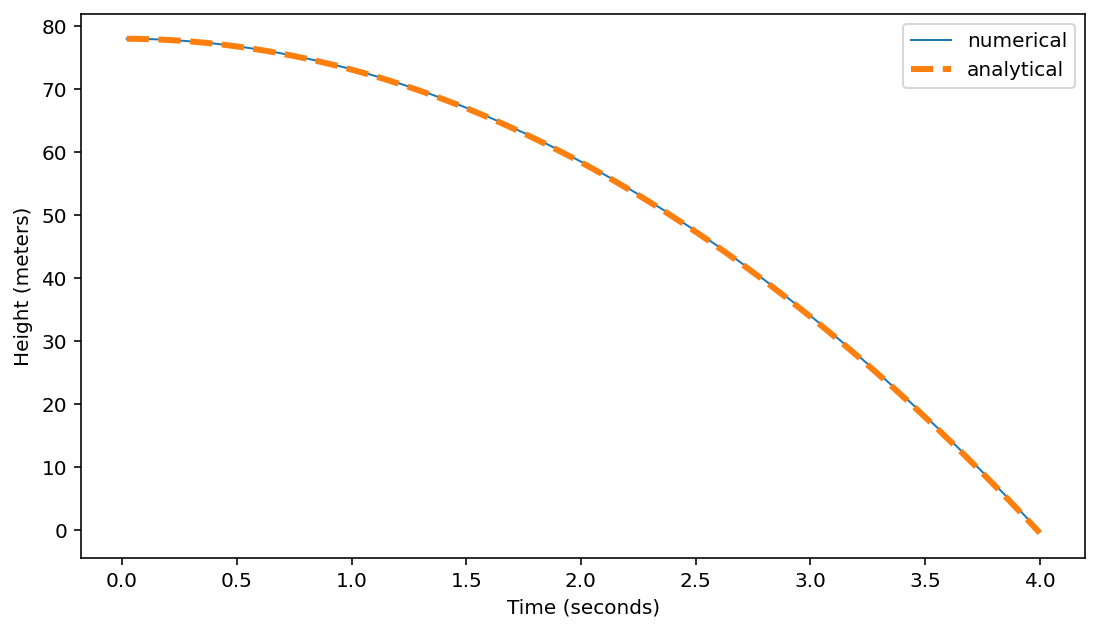

In [7]:
# matplotlib import
%matplotlib inline
import matplotlib.pyplot as plt


def fall(t_values, initial_height=78.0):
    """Calculate the height of an object falling from rest

       Use the analytical formula y = y0 + 0.5*a*t**2 to
       calculate the height of an object falling from rest
       as a function of time.

       Args:
           t_values (array): an array of time values at which to calculate height
           initial_height (float): an optional initial height. Default is 78m
    """
    # REPLACE "1.0" BELOW WITH THE CORRECT FORMULA TO RETURN HEIGHT
    # hint: t_values is a numpy array, so there is no need to use a for loop
    return initial_height + (0.5*-g*t_values**2)
# use the function above to calculate values
y_formula = fall(t_values)

# plot the two and compare
fig, axis = plt.subplots(figsize=(9,5))

# plot numerical solution with thin line
axis.plot(t_values,y_values,label='numerical',lw=1)

# plot the analytical solution with a thick dashed line
axis.plot(t_values,y_formula,ls='--',lw=3,label='analytical')

# draw a legend
axis.legend()

# label axes and show
axis.set_xlabel('Time (seconds)')
axis.set_ylabel('Height (meters)')
plt.show()

We can see that Euler's method worked. However, it was totally uneccessary, since there's an analytical solution in this case. Let's look at another example that **can't** be solved analytically - the simple pendulum.

## Example 2: The Simple Pendulum

A simple pendulum of length $l$ is described by the differential equation

$$\frac{d^2\theta}{dt^2} = -\frac{g}{l} \sin \theta,$$

where $\theta(t)$ is the angular displacement as a function of time. To solve this numerically the first step is, once again, to convert this second order equation into two coupled first order equations:


$$
\frac{d\theta}{dt} = \omega(t) 
$$
$$
\frac{d\omega}{dt} = -\frac{g}{l}\sin \theta.
$$

The corresponding Euler equations are:

$$\omega_{n+1} = \omega_n- \frac{g}{l} \sin( \theta_n ) \tau$$
$$\theta_{n+1} = \theta_n + \omega_n \tau.$$

The code below solves the simple pendulum equation using Euler's method. I've started the pendulum from rest with an initial displacement of 10$^{\circ}$. The pendulum is a nice long 10m. **Again, read the code and the comments carefully to make sure you understand**.

took 0.0011131763458251953 seconds


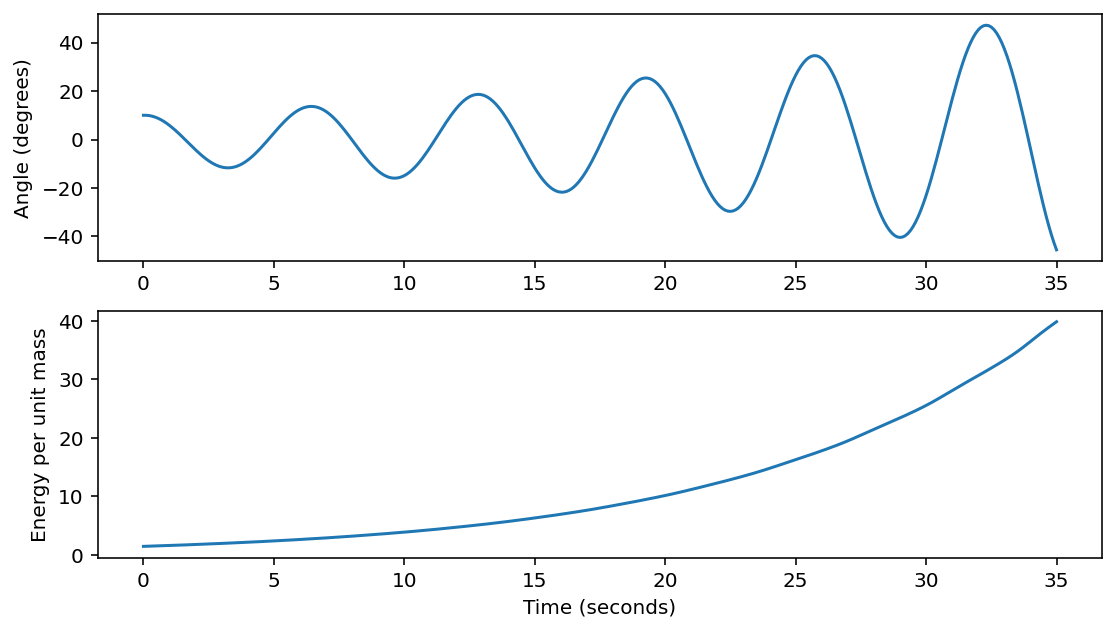

In [8]:
import time
### INITIAL CONDITIONS
# initial displacement, theta
theta = np.radians(10) # 10 degrees in radians - remember, np.sin needs an angle in radians
omega = 0.0 # omega=0 (start at rest)
tau = 0.1 # timestep of 0.1s
t_now = 0.0 # start at t=0s

l = 10.0 # length of pendulum in m
g = 9.8  # gravity

# we will use lists to store our result at each timestep.
# Initialise with starting values
theta_values = [theta]
omega_values = [omega]
t_values = [t_now]

start = time.time()
# solve motions for 35s
while t_now < 35:

    # time after timestep
    t_now = t_now + tau

    # calculate values after timestep
    theta_new = theta + omega*tau
    omega_new = omega - g * np.sin(theta) * tau / l

    # update current values
    theta = theta_new
    omega = omega_new

    # store in lists
    theta_values.append(theta)
    t_values.append(t_now)
    omega_values.append(omega)

# finished loop
end = time.time()
print(f"took {end-start} seconds")

# convert lists to arrays
t_values = np.array(t_values)
theta_values = np.array(theta_values)
omega_values = np.array(omega_values)

# Calculate Energy per unit mass
Energy_per_unit_mass = 0.5*l**2*omega_values**2 + g*l*(1 - np.cos(theta_values)) # Use below equation

# convert theta back to degrees
theta_values = np.degrees(theta_values)

# plot!
fig, axis1 = plt.subplots( figsize=(9,5),nrows=2,ncols=1)
axis1[0].plot(t_values,theta_values)
axis1[1].plot(t_values, Energy_per_unit_mass)
# label axes and show
axis1[1].set_xlabel('Time (seconds)')
axis1[0].set_ylabel('Angle (degrees)')
axis1[1].set_ylabel('Energy per unit mass')

axis1[0].axis('tight')
plt.show()

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>A matter of energy</h2>
</div>
</section>

> Looking at the plot above, something is clearly going wrong! A pendulum shouldn't describe larger oscillations as time goes by without being forced. We can get a handle on what is going on by seeing what is happening to the pendulum's ernergy!

> Modify the code above$^1$ to add a subplot of the energy per unit mass of the pendulum as a function of time. The total energy per unit mass of a pendulum can be written as

> $$E/m = \frac{1}{2} l^2 \omega^2 + gl (1-\cos\theta).$$

> Run the resulting code for time steps of 0.1, 0.01 and 0.001 seconds. By what fraction does the energy change given these three time steps? Did the result improve with smaller time steps? Did the program take significantly longer for the smaller time steps?

> Write your answers to these question in the markdown cell below.

> $^1$ it's a good idea to duplicate the original code cell and make changes in the duplicate

### The plot improves with smaller time steps, the time take to run the code cell significantly increases with smaller time steps



## Truncation Error

Clearly the code for the pendulum above is incorrect at some level since the results violate the law of energy conservation! The reason for the behaviour above is the approximation we made in using a finite timestep. The equation we used

$$\frac{dy}{dt} \approx \frac{y(t+\tau) - y(t)}{\tau},$$

is only an approximation to the true differential, and the approximation gets worse as the timestep gets larger. You may well remember this fact from the orbit calculation lab you did in the first year. 

One solution is to use a finer timestep, which makes the approximation better. This is at the expense of computation time. The other solution is to use a more sophisticated method than Euler's method.

Scipy has a sophisticated and more accurate solver for ordinary differential equations (ODEs) called **Isoda**. In the homeworks we will see how to use Scipy's ODE solver.

---------
<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h1>Homework #4</h1>
<h2><span class="fa fa-pencil"></span>Solving ODEs with SciPy</h2>
</div>
</section>

SciPy's ODE solvers are found in the ```scipy.integrate``` package. There are two functions of interest in that package. ```odeint``` is the simplest, whilst ```ode``` is more flexible. The two are quite similar in use, so we'll focus on the simpler of the two, ```odeint``` here.

The difference between SciPy's ODE solvers and the Euler method we coded by hand above is that SciPy uses clever computer algorithms to be more accurate with the same timestep. This saves computing time and allows more difficult problems to be solved. We won't concern ourselves with the details of these algorithms - we'll just look at using them like a "black box".

The key with using SciPy is to remember that ODEs are ones that can be written in the form

$$
\frac{d{\mathbf X}}{dt} = {\mathbf f}({\mathbf X}, t),
$$

where the bold typeface indicates a vector. Looking again at the equation describing the motion of a pendulum of length $l$

$$\frac{d^2\theta}{dt^2} = -\frac{g}{l} \sin \theta,$$

where $\theta(t)$ is the angular displacement as a function of time. Again, it's not obvious that this can be reduced to the form above. As we saw earlier though, we can write this as two coupled equations:

$$\begin{align*}
\frac{d\theta}{dt} &= \omega(t) \\
\frac{d\omega}{dt} &= -\frac{g}{l}\sin \theta.
\end{align*}
$$

This can be written in the initial vector form if the vector ${\mathbf X}$ is set to

$$
{\mathbf X} = \begin{bmatrix}\theta \\ \omega \end{bmatrix}
$$

With ${\mathbf X}$ defined, we can see that it's differential is 

$$
{\mathbf f}({\mathbf X}, t) = \frac{d{\mathbf X}}{dt} = \begin{bmatrix}\omega \\ -\frac{g}{l}\sin \theta \end{bmatrix}
$$

## Using odeint

```odeint``` is part of the ```scipy.integrate``` package. It has three required arguments. The first argument is the name of a Python **function** that calculates ${\mathbf f}({\mathbf X}, t)$. The second argument is a Python list or numpy array - the entries in this list give the initial conditions of the entries in the vector ${\mathbf X}$. The final argument is an array containing the time points at which we want to solve the system state.

The returned value is a two-dimensional array. The first index specifies the time, and the second index specifies the element of the vector ${\mathbf X}$ at that time. An example will make things clearer!

Below I solve the pendulum problem again using ```odeint```:

Solving pendulum at 350 times
Shape of X is (350, 2)


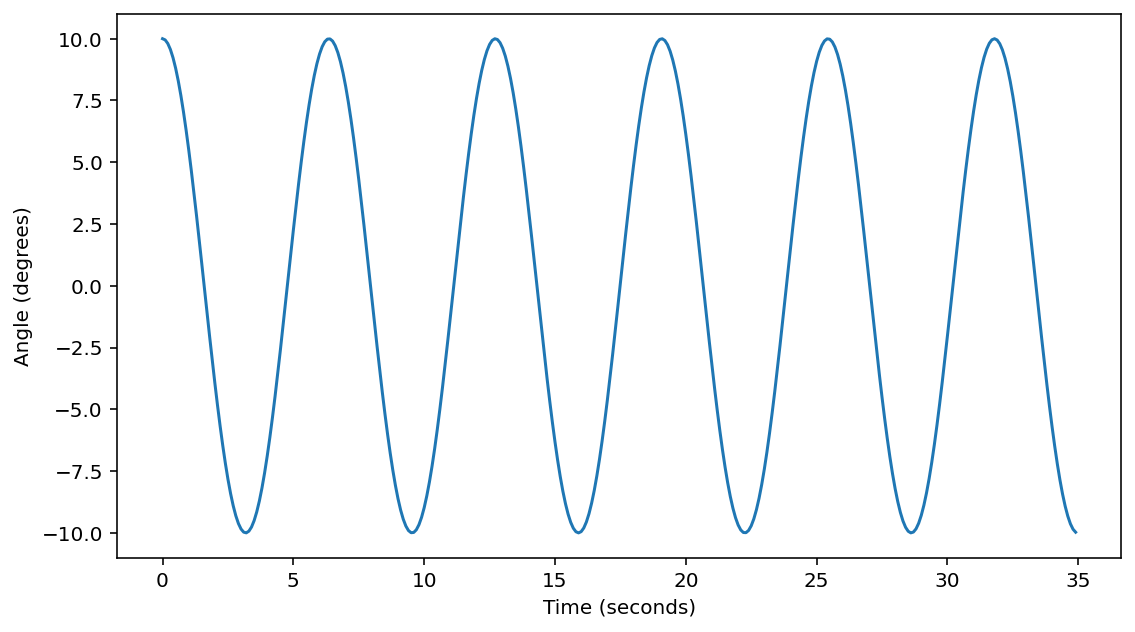

In [9]:
from scipy.integrate import odeint

### INITIAL CONDITIONS
# initial displacement, theta
theta = np.radians(10) # 10 degrees in radians - remember, np.sin needs an angle in radians
omega = 0.0 # omega=0 (start at rest)

l = 10.0 # length of pendulum
g = 9.8  # gravity.

# intial state vector - 
X0 = [theta, omega]

# define an array of times to calculate solution for
# We will go from 0 to 35s, with a timestep of 0.1s
t = np.arange(0.0, 35.0, 0.1)
print ("Solving pendulum at {} times".format(len(t)))

"""
The first argument for odeint is a function that calculates f = dX/dt.

This function in turn has two arguments. The first is the "state" of the system  - the vector X.
The second is the time. We don't use it in this case, but our function definition
has to follow the form expected by odeint.

We have to write this function ourselves, which I do below.
"""
def f_func(state, time):
    # state list is [theta, omega]
    # unpack into named variables
    # THINK! - are these the same omega, theta as above (global/local)?
    theta, omega = state
    # function should return dX/dt
    return [omega, -g*np.sin(theta)/l]

#Solving these equations is as simple as calling odeint!
X = odeint(f_func, X0, t)

print ("Shape of X is {}".format(X.shape))
# X is a 2D array.
# each row is the state vector [theta, omega] at a given time
# each column is how that component changes with time
theta = X[:, 0]
omega = X[:, 1]

# convert theta back to degrees from radians
theta = np.degrees(theta)

# plot!
fig, axis = plt.subplots(figsize=(9,5))
axis.plot(t,theta)
# label axes and show
axis.set_xlabel('Time (seconds)')
axis.set_ylabel('Angle (degrees)')
axis.axis('tight')
plt.show()

Fantastic! It works very well - even though the timestep of 0.1s gave an innacurate solution using Euler's method, the same timestep gives what looks like accurate behaviour using the Isoda algorithm used by ```odeint```. Now you've seen an example, your homework is to re-visit our first example of an object falling under gravity, but to add air resistance!

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Q1: Adding air resistance (4 points)</h2>
</div>
</section>

> For an object of mass $m$ falling straight down against air resistance, the differential equation is

> $$m \frac{d^2y}{dt^2} = -mg + \frac{1}{2} C_d \rho A v_y^2,$$

> The second term on the RHS is the drag force, where $\rho$ is the density of air, $A$ is the cross-sectional area of the object and $C_d$ is the drag coefficient. The drag coefficient is dimensionless and depends on the shape of object. For a smooth spherical object falling reasonably fast, $Cd \approx 0.5$.

> Using this equation, complete the code below to define a function that calculates ${\mathbf f}({\mathbf X}, t) = \frac{d{\mathbf X}}{dt}$.

> *Hint: a good choice of ${\mathbf X}$ in this case is *

> $$
{\mathbf X} = \begin{bmatrix}v_y \\ y \end{bmatrix}
$$

> **Remember, your homework will be marked in part based on whether it passes the tests after each question. Make sure your code passes these tests!**

In [12]:
def f_func(state, time, cd, mass, rho, A):
    """Calculate the differential of state vector as a function of time

    Args:
        state (list): the state vector at time t
        time (float): the time t
        cd (float): the dimensionless drag coefficient
        mass (float): mass of the object in kg
        rho (float): density of air (kg/m3)
        A (float): cross-sectional area of object (kg)

    Returns:
        (list): the differential of the state vector at time t
    """
    # defensive program - check shape of state vector
    assert len(state)==2, "Expected length 2 state vector"
    vy,y = state
    # WRITE YOUR CODE HERE
    return [-g+(0.5*cd*rho*A*(vy**2)/mass), vy] # Take equation from above and divide by mass

In [13]:
from nose.tools import assert_equal, assert_almost_equal
a,vy = f_func([0.,78.],0.0,0.5,1,1.2,1)
assert_almost_equal(a, -9.8)
assert_almost_equal(vy, 0.0)
a,vy = f_func([-2.,78.],0.0,0.5,1,1.2,1)
assert_almost_equal(a,-8.6)
assert_almost_equal(vy,-2)
a,vy = f_func([2.,78.],0.0,0.5,2,1.2,1)
assert_almost_equal(a,-9.2)
assert_almost_equal(vy,2)

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Q2: Solving the equation (4 points)</h2>
</div>
</section>

> Use your equation and ```odeint``` to calculate how a football would fall from the Art's tower. The tower is 78m high. The density of air is roughly 1.2 kg m$^{-3}$. A football weighs roughly 0.45 kg and has a cross sectional area of 0.38 m$^2$.

> Store the solution for the height of the ball in an array called ```y```. Plot $y$ against $t$ to make sure your solution makes sense.

> *Hint: the definition of your ```f_func``` function differs from the simple one we used in class. You will need to use the ```args``` optional argument of ```odeint``` to pass the extra arguments to your function* The ```args``` optional argument for ```odeint``` works in exactly the same way as it did for the integration function ```quad``` we used last week.

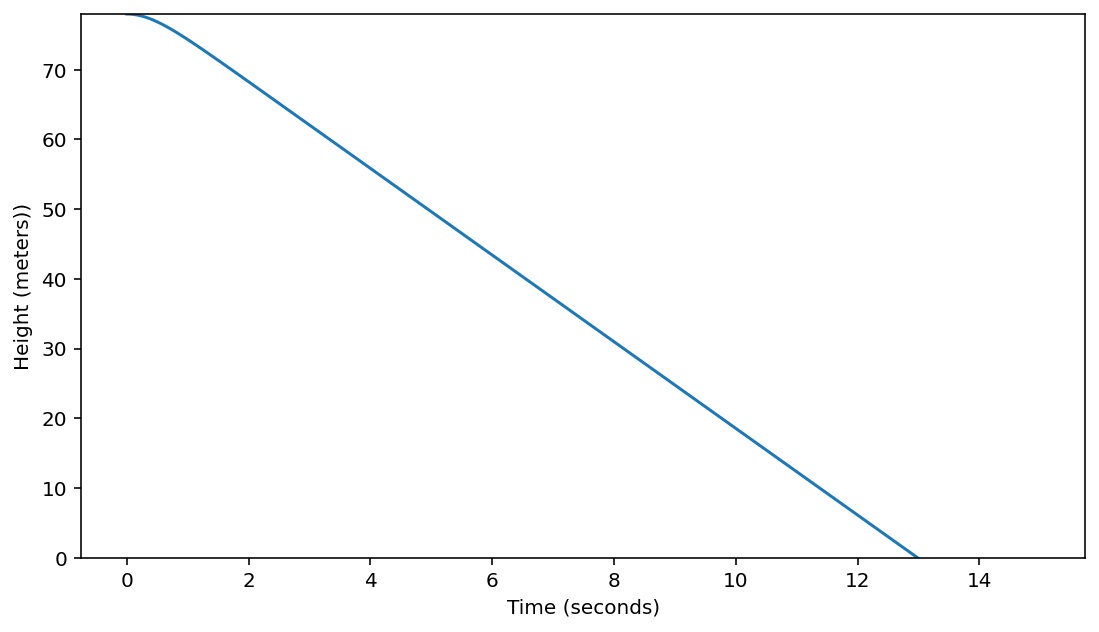

In [14]:
# initial conditions
y   = 78.0  # Height of the art's tower, in metres
vy  =  0.0  # Starting at rest
rho = 1.2 # Density of air [kg /m^3]
mass = 0.45 # Mass of football [kg]
A = 0.38 # Cross sectional area of football [m^2]
cd = 0.5 # Drag coefficient 

# array of times for the solution
# from 0-15 seconds with timestep of 0.01s
t = np.arange(0.0, 15.0, 0.01)

# initial state vector
X0 = [vy, y]

# WRITE YOUR CODE HERE
X = odeint(f_func, X0, t, args=(cd, mass, rho, A))

y = X[:,1]

# plot!
fig, axis = plt.subplots(figsize=(9, 5))
axis.plot(t,y)
# label axes and show
axis.set_xlabel('Time (seconds)')
axis.set_ylabel('Height (meters))')
axis.set_ylim((0, 78))
plt.show()

In [15]:
assert_almost_equal(y[0], 78)
assert_almost_equal(y[-1], -12.496644246)
assert_equal(len(y), 1500)
assert_equal(len(y.shape), 1)

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Q3: Terminal Velocity (2 points)</h2>
</div>
</section>

> After a few seconds, your graph of $y$ vs $t$ should be linear. This is because the football has reached *terminal velocity*. In the code cell below, calculate the terminal velocity of the football, and store it in the variable named ```vy_terminal```.

Terminal velcoity equation is as follows:

$ V_{t} = \sqrt{\frac{2*m*g}{\rho*A*C_{d}}} $  

Inputting mass, gravity, density, Drag coefficient and Cross sectional area values yields a value for terminal velocity

In [31]:
vy_terminal = -np.sqrt((2 * mass * g)/(rho * A * cd))  # Velocity is in negative vertical direciton, hence negative velocty 
print(f"terminal velocity is {vy_terminal} m/s")

terminal velocity is -6.219663216470471 m/s


In [32]:
assert_almost_equal(vy_terminal, -6.21966321668)

<section class="panel panel-warning"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Extra Credit (3 points)</h2>
</div>
</section>

> Extra credit questions allow you to make up for marks dropped in this and other homeworks. You can't score more than 100% overall, but if you get 3 extra credit points this week, and lose 3 points next week, you'd still be on course for 100% marks. I don't expect you to answer extra credit questions, *unless you want to*.

> For extra credit this week, use odeint to plot $y$ vs $t$ for a football, a beach-ball and a golf ball falling from the Arts Tower. Correctly label your plot so you know which is which.

> Calculate the length of time each ball takes to hit the ground.

> A golf ball weighs 45g and has a cross-sectional area of $1.43 \times 10^{-3}$ m$^2$. A beach ball weighs 100g and has a cross-sectional area of $\pi$ m$^2$.

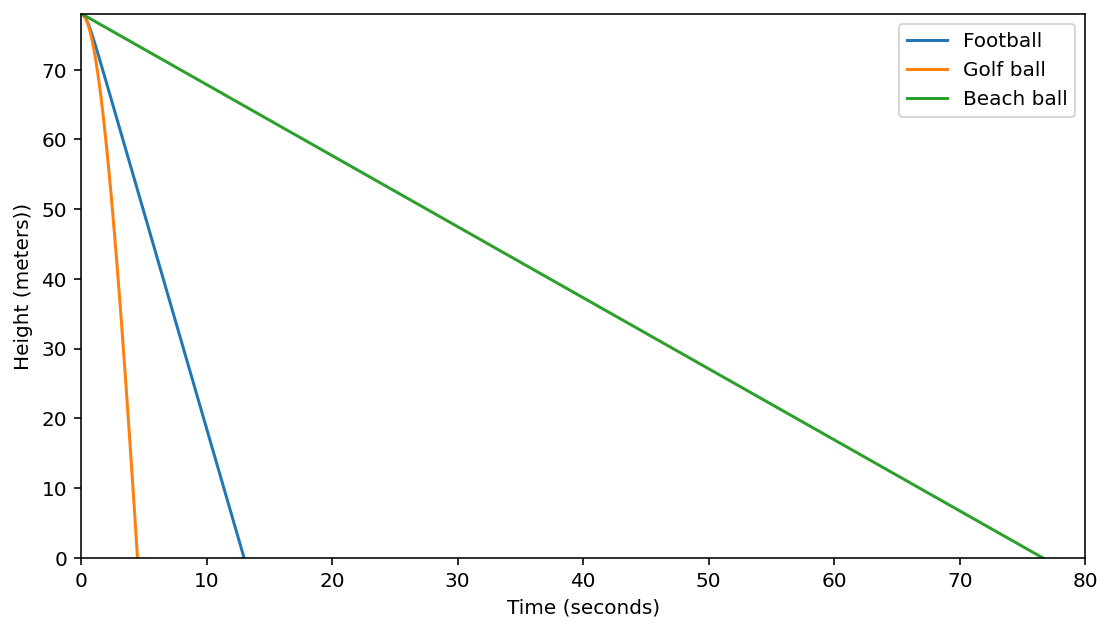

golfball takes 4.498 seconds to reach the ground
Football takes 12.98 seconds to reach the ground
Beach ball  takes 76.56 seconds to reach the ground


In [59]:
from scipy.interpolate import interp1d


# initial conditions
y   = 78.0  # Height of the art's tower, in metres
vy  =  0.0  # Starting at rest
rho = 1.2 # Density of air [kg /m^3]
football_mass = 0.45 # Mass of football [kg]
football_A = 0.38 # Cross sectional area of football [m^2]
golfball_mass = 0.045 # Mass of golf ball [kg]
golfball_A = 1.43e-3 # Cross sectional area of golf ball [m^2]
beachball_mass = 0.1 # Mass of Beach ball [kg]
beachball_A = np.pi # Cross sectional area of Beach ball [m^2]
cd = 0.5 # Drag coefficient 

# array of times for the solution
# from 0-90 seconds with timestep of 0.01s
#t = np.arange(0.0, 15.0, 0.01)
t = np.arange(0.0, 90, 0.01)

# initial state vector
X0 = [vy, y]

# WRITE YOUR CODE HERE
X_football = odeint(f_func, X0, t, args=(cd, football_mass, rho, football_A))
X_golfball = odeint(f_func, X0, t, args=(cd, golfball_mass, rho, golfball_A))
X_beachball = odeint(f_func, X0, t, args=(cd, beachball_mass, rho, beachball_A))


y_football = X_football[:,1]
y_golfball = X_golfball[:,1]
y_beachball = X_beachball[:,1]

# plot!
fig, axis = plt.subplots(figsize=(9, 5))
axis.plot(t,y_football, label="Football")
axis.plot(t,y_golfball, label="Golf ball")
axis.plot(t,y_beachball, label="Beach ball")

# label axes and show
axis.set_xlabel('Time (seconds)')
axis.set_ylabel('Height (meters))')
axis.set_xlim(0,80)
axis.set_ylim((0, 78))


axis.legend()

plt.show()


#Time calculations
golfball_interp = interp1d(y_golfball, t)
football_interp = interp1d(y_football, t)
beachball_interp = interp1d(y_beachball, t)

T_golfball = golfball_interp(0) #Time taken for golf ball to reach the ground 
T_football = football_interp(0) #Time taken for football to reach the ground
T_beachball = beachball_interp(0) #Time taken for beach ball to reach the ground


print(f"golfball takes {T_golfball:.3f} seconds to reach the ground")
print(f"Football takes {T_football:.2f} seconds to reach the ground")
print(f"Beach ball  takes {T_beachball:.2f} seconds to reach the ground")